#Paso 1: Comprensión del Dataset
Primero, necesitamos entender el conjunto de datos "Credit Card Fraud Detection". Asegúrate de revisar la información disponible, como las columnas, tipos de datos, distribuciones, y si hay datos faltantes.

#Paso 2: Preprocesamiento de Datos
Realiza tareas de preprocesamiento para asegurarte de que los datos estén limpios y listos para el modelado. Esto puede incluir la normalización de datos, manejo de valores faltantes y codificación de variables categóricas.

#Paso 3: Exploración de Datos
Explora las estadísticas descriptivas del conjunto de datos y visualiza las características importantes. Esto ayudará a entender la distribución de las transacciones y a identificar patrones que podrían indicar fraudes.

#Paso 4: División de Datos
Divide el conjunto de datos en conjuntos de entrenamiento y prueba. Esto es esencial para evaluar el rendimiento del modelo en datos no vistos.

#Paso 5: Selección del Modelo
Elige al menos un algoritmo de aprendizaje supervisado para construir el modelo de detección de fraudes. Algunos modelos comunes para este tipo de problemas son Support Vector Machines (SVM), Random Forest, y Logistic Regression.

#Paso 6: Entrenamiento del Modelo
Entrena el modelo utilizando el conjunto de entrenamiento. Ajusta los hiperparámetros para optimizar el rendimiento del modelo.

#Paso 7: Evaluación del Modelo
Evalúa el modelo utilizando el conjunto de prueba. Utiliza métricas como precisión, recall, F1-score y matriz de confusión para medir el rendimiento de la detección de fraudes.

#Paso 8: Análisis de Características Importantes
Analiza las características importantes identificadas por el modelo. Esto te dará información sobre qué características tienen más peso en la detección de fraudes.

#Paso 9: Documentación
Documenta todo el proceso, desde la comprensión del conjunto de datos hasta la evaluación del modelo. Esto facilitará la comunicación de tus resultados y permitirá a otros entender y reproducir tu trabajo.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Montar Google Drive si aún no lo has hecho
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Cargar el conjunto de datos desde Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv'  # Reemplaza 'your_path' con la ruta correcta en tu Google Drive
df = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos
print(df.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
# Información del conjunto de datos (tipos de datos, valores no nulos, etc.)
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Estadísticas descriptivas del conjunto de datos
print(df.describe())



                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

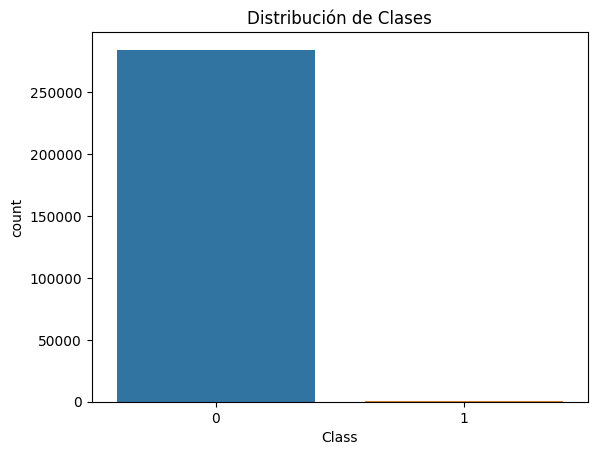

In [8]:
# Visualizar la distribución de la variable objetivo (fraude o no fraude)
sns.countplot(x='Class', data=df)
plt.title('Distribución de Clases')
plt.show()

In [9]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos usando StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

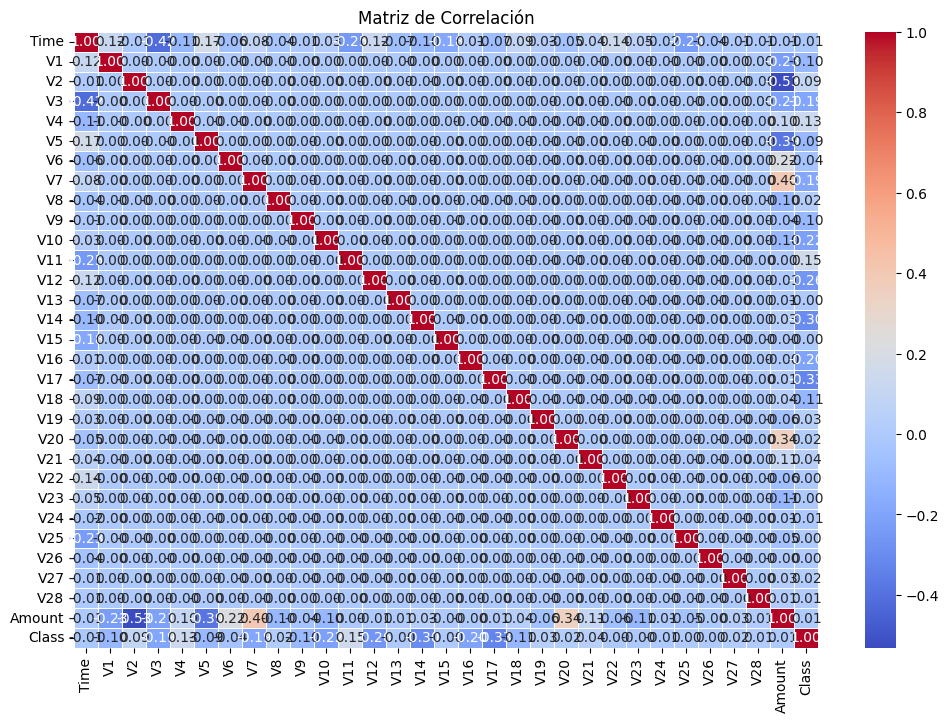

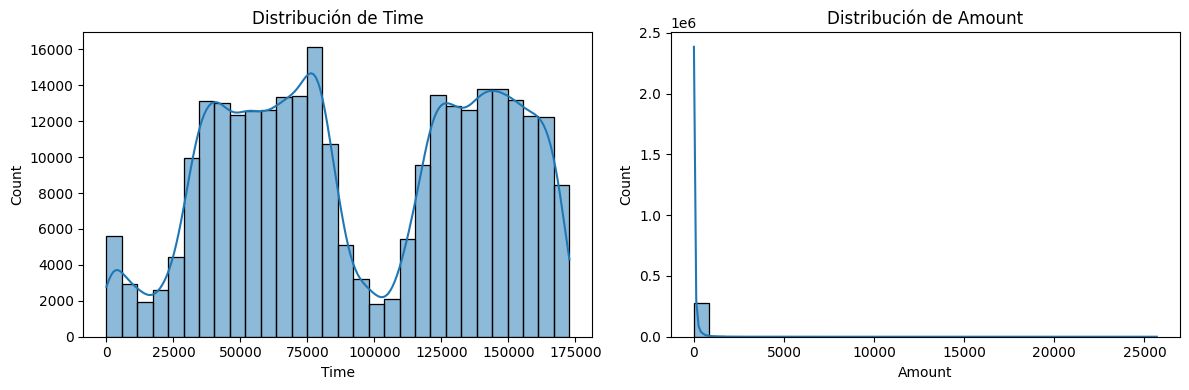

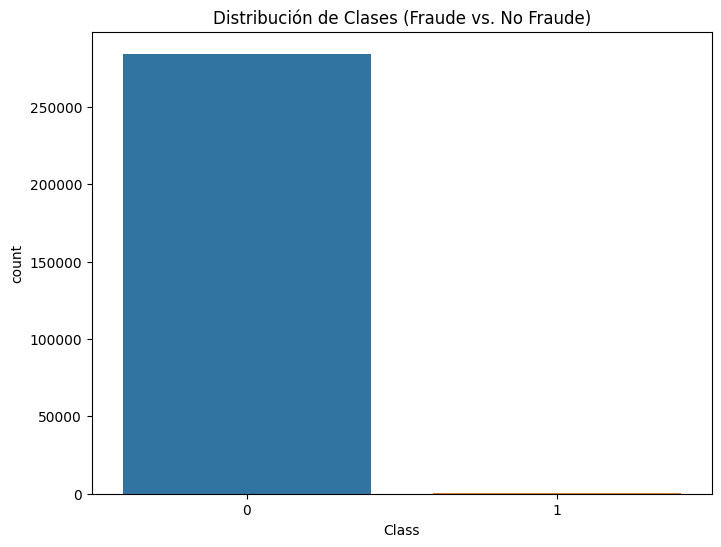

In [10]:
# Estadísticas descriptivas del conjunto de datos
print(df.describe())

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Visualización de las distribuciones de las características más importantes
features_of_interest = ['Time', 'Amount']

plt.figure(figsize=(12, 4))
for feature in features_of_interest:
    plt.subplot(1, 2, features_of_interest.index(feature) + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

# Visualización de las transacciones fraudulentas frente a las no fraudulentas
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribución de Clases (Fraude vs. No Fraude)')
plt.show()


In [11]:
# Importar la biblioteca necesaria
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (227845, 30)
Forma de X_test: (56962, 30)
Forma de y_train: (227845,)
Forma de y_test: (56962,)


In [12]:
# Importar la biblioteca necesaria
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear una instancia del modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[56862     2]
 [   23    75]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear una instancia del modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Realizar la búsqueda de cuadrícula en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores Hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

# Evaluar el rendimiento del modelo ajustado
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Hacer predicciones en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Imprimir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)


NameError: ignored

In [ ]:
# Obtener las características importantes del modelo
feature_importances = best_rf_model.feature_importances_

# Crear un DataFrame para mostrar las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las características importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de Características en la Detección de Fraudes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


NameError: ignored